# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Christian Andreas Roeroe
- **Email:** christianandreasroeroe@gmail.com
- **ID Dicoding:** reasonly40

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan penyewaan sepeda antara hari kerja dan hari libur?
- Bagaimana korelasi antara variabel cuaca (temp, atemp, hum, windspeed) dengan jumlah penyewaan sepeda harian?

Pertanyaan - pertanyaan diatas akan menjadi sebuah pembahasan dalam memahami permasalahan bisnis dalam kasus penyewaan sepeda untuk didapatkan *insight* yang bermakna.

## Import Semua Packages/Library yang Digunakan

In [22]:
# Melakukan import library yang dibutuhkan dalam melakukan analisis data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Library-library yang digunakan dalam Analisa Data, yakni :
- `numpy` untuk melakukan komputasi numerik dari operasi dasar hingga kompleks.
- `pandas` untuk memanipulasi dan menganalisis data.
- `matplotlib` untuk mendukung pembuatan visualisasi data.
- `seaborn` untuk membuat visualisasi data atraktif dan informatif.
- `datetime` untuk membantu dalam bekerja dengan data berupa tanggal dan waktu.

## Data Wrangling

### Gathering Data

Dataset yang dibutuhkan dalam analisis data terdiri dari dua data dalam bentuk format Comma Separated Value (CSV), yaitu *day* yang berisi data penyewaan sepeda dalam satuan hari. Dan *hour* berisi data penyewaan sepeda dalam satuan jam. Masing-masing data di assign ke dalam variabel dataframe yang akan digunakan pada tahap selanjutnya.

In [23]:
# Membaca file hour.csv dan menampilkan 5 baris pertama
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [24]:
# Membaca file day.csv dan menampilkan 5 baris pertama
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Memperoleh dataset sumber yang terdiri dari 2 file data dalam bentuk *csv* dan dimasukkan ke dalam tiap variabel untuk dilakukan *data preprocessing* pada tahap selanjutnya.
- Menampilkan isi dari setiap dataframe yang hanya menampilkan 5 baris pertama dengan menggunakan library `pandas` tujuannya untuk mengetahui struktur dan isi data.

## Assessing Data

Penting untuk memperhatikan struktur data dari sumber dataset agar dapat mengidentifikasi data untuk analisa selanjutnya.

In [25]:
# Melihat struktur data dari hour_df dan day_df
for dataset in [hour_df, day_df]:
    print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

Dari struktur kedua data diatas, kolom-kolomnya terdiri dari :
- instant: Indeks dalam dataset.
- dteday: Tanggal dalam format YYYY-MM-DD.
- season: Musim dalam setahun, diwakili oleh angka (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin).
- yr: Tahun (0 untuk 2011 dan 1 untuk 2012).
- mnth: Bulan dalam satuan angka (1-12, dari Januari sampai Desember).
- hr : Jam (skala 0-24)
- holiday: Menunjukkan bahwa hari itu adalah hari libur nasional (1: Ya, 0: Tidak).
- weekday: Hari dalam seminggu, (direpresentasikan dalam 0-6, Minggu - Sabtu).
- workingday: Menunjukkan bahwa hari itu adalah hari kerja (1: Ya, 0: Tidak).
- weathersit: Kondisi cuaca dengan kode kategori (1: Cerah, 2: Berawan, 3: Hujan atau salju ringan, 4: Hujan atau salju lebat).
- temp: Suhu (dalam skala normalisasi antara 0 dan 1).
- atemp: Suhu yang dirasakan (dalam skala normalisasi antara 0 dan 1).
- hum: Kelembaban (dalam skala normalisasi antara 0 dan 1.
- windspeed: Kecepatan angin (dalam skala normalisasi antara 0 dan 1).
- casual: Jumlah penyewa sepeda yang tidak terdaftar.
- registered: Jumlah penyewa sepeda yang terdaftar.
- cnt: Total penyewaan sepeda (Jumlah casual dan registered).

Setelah melihat struktur datanya, perlu untuk melihat kesalahan data seperti *missing value*, *invalid value*, *duplicate data*, dan masalah data lainnya.

In [26]:
# Daftar DataFrame dari dataset sumber
dataframes = {
    "hour_df": hour_df,
    "day_df": day_df
}

# Melakukan perulangan for pada dataframe untuk menampilkan data null
for df_name, df in dataframes.items():
    print(f"Data Null dari DataFrame {df_name}:\n{df.isna().sum()}\n")

Data Null dari DataFrame hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data Null dari DataFrame day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



In [27]:
# Melakukan perulangan for pada dataframe untuk menampilkan jumlah duplikasi
for df_name, df in dataframes.items():
    print(f"Jumlah Duplikasi dari {df_name}: {df.duplicated().sum()}\n")

Jumlah Duplikasi dari hour_df: 0

Jumlah Duplikasi dari day_df: 0



Dilakukan penampilan statistik deskriptif dari data *hour_df* dan *day_df*.

In [28]:
# Melakukan perulangan for pada dataframe untuk menampilkan statistik data
for df_name, df in dataframes.items():
    print(f"{df_name}: {df.describe()}\n")

hour_df:           instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.63935

**Insight:**
- Dari identifikasi kedua file, tidak ditemukan data yang hilang, duplikat, dan permasalahan data lainnya.
- Kedua file dataset cukup bersih, namun pada strukturnya terdapat kesalahan tipe data pada kolom *dteday* yang terbaca string atau `object` seharusnya `datetime`.

# Cleaning Data

Kolom *dteday* sebelumnya bertipe data *string* diubah menjadi *datetime* supaya dapat digunakan analisis data dengan format data yang konsisten.

In [29]:
# Mengubah tipe data pada kolom 'dteday' menjadi datetime
dtime_cols = ["dteday"]
for col in dtime_cols:
  hour_df[col] = pd.to_datetime(hour_df[col])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [30]:
# Mengubah tipe data pada kolom 'dteday' menjadi datetime
dtime_cols = ["dteday"]
for col in dtime_cols:
  day_df[col] = pd.to_datetime(day_df[col])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Perlunya pengubahan nama kolom yang terlihat disingkat menjadi nama yang jelas agar mudah dibaca saat melakukan analisis data.

In [31]:
# Melakukan perubahan nama kolom agar lebih mudah dibaca
hour_df = hour_df.rename(columns={'dteday': 'dateDay', 'yr': 'year', 'mnth': 'month', 'hr': 'hour'})
hour_df.rename(columns={'dteday': 'dateDay', 'yr': 'year', 'mnth': 'month', 'hr': 'hour'}, inplace=True)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dateDay     17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [32]:
# Melakukan perubahan nama kolom agar lebih mudah dibaca
day_df = day_df.rename(columns={'dteday': 'dateDay', 'yr': 'year', 'mnth': 'month'})
day_df.rename(columns={'dteday': 'dateDay', 'yr': 'year', 'mnth': 'month'}, inplace=True)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateDay     731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data pada kolom 'dteday' telah diganti ke `datetime` supaya dapat dianalisis dengan mudah dalam basis waktu.
- Pengubahan nama kolom yang sebelumnya disingkat menjadi lengkap (misal *yr* menjadi *year*) dapat memudahkan dalam memahami data saat bekerja.

# Exploratory Data Analysis

### Explore hour_df

Pada tahap ini, dilakukan eksplorasi data dengan menerapkan .describe untuk menampilkan statistik deskriptif dari seluruh kolom dataframe hour_df.

In [33]:
hour_df.describe(include="all")

,instant,dateDay,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Dikelompokkan data hour_df berdasarkan jam dan hari kerja, pada label kolom 0 mengartikan data bukan hari kerja dan 1 mengartikan data hari kerja.

In [34]:
# Mengelompokkan data berdasarkan jam dan hari kerja, lalu dijumlahkan
hourly_working_day = hour_df.groupby(['hour', 'workingday'])['cnt'].sum().unstack()
hourly_working_day

workingday,0,1
hour,,
0,20884,18246
1,15987,8177
2,12123,4229
3,5851,2323
4,1876,2552
5,1929,12332
6,4292,50840
7,10027,144144
8,24406,236595


### Explore day_df

Melakukan eksplorasi data pada dataframe day_df dengan menampilkan statistik deskriptif.

In [35]:
day_df.describe(include="all")

,instant,dateDay,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Menghitung korelasi data jumlah penyewaan sepeda dengan variabel seperti *temp*, *atemp*, *hum*, dan *windspeed*.

In [36]:
# Menghitung korelasi antara variabel cuaca dan jumlah peminjaman
weather_vars = ['temp', 'atemp', 'hum', 'windspeed']
correlation_matrix = day_df[weather_vars + ['cnt']].corr(method='pearson')

# Menampilkan korelasi dengan variabel target (cnt)
target_correlations = correlation_matrix['cnt'].drop('cnt')
print("\nKorelasi dengan Jumlah penyewaan (cnt):\n", target_correlations)


Korelasi dengan Jumlah penyewaan (cnt):
 temp         0.627494
atemp        0.631066
hum         -0.100659
windspeed   -0.234545
Name: cnt, dtype: float64


### Explore all_df

In [37]:
# Melakukan penggabungan data antara day_df dengan hour_df menjadi all_df
df_combined = pd.concat([day_df, hour_df], ignore_index=True)

# Simpan ke file baru
df_combined.to_csv("main_data.csv", index=False)

**Insight:**
- Pada tahap Exploratory Data Analysis dilakukan pada tiap dataframe, yakni hour_df dan day_df sebagai persiapan untuk visualisasi data untuk menjawab perbandingan penyewaan sepeda dan hubungan korelasi.
- Dilakukan penggabungan data hour_df dan day_df dan disimpan dalam file main_data.csv untuk digunakan sebagai data dashboard.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana perbandingan penyewaan sepeda antara hari kerja dan hari libur?

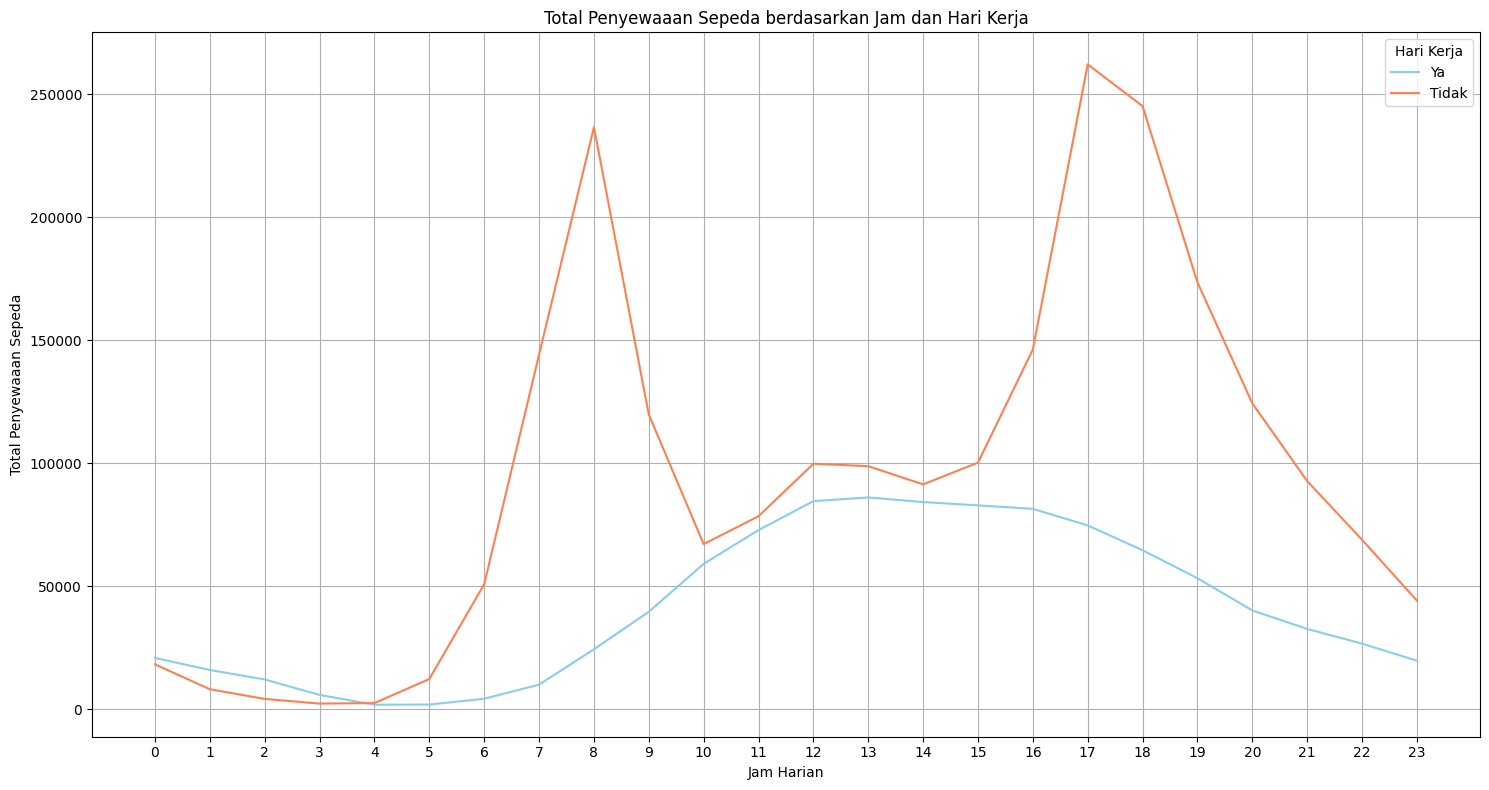

In [38]:
# Membuat Line Plot Total Penyewaaan Sepeda berdasarkan Jam dan Hari Kerja
plt.figure(figsize=(15, 8))
hourly_working_day.plot(kind='line', ax=plt.gca(), color=['skyblue', 'coral'])
plt.title('Total Penyewaaan Sepeda berdasarkan Jam dan Hari Kerja')
plt.xlabel('Jam Harian')
plt.ylabel('Total Penyewaaan Sepeda')
plt.xticks(range(24))
plt.legend(title='Hari Kerja', labels=['Ya', 'Tidak'])
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

Bagaimana korelasi antara variabel cuaca (temp, atemp, hum, windspeed) dengan jumlah penyewaan sepeda harian?

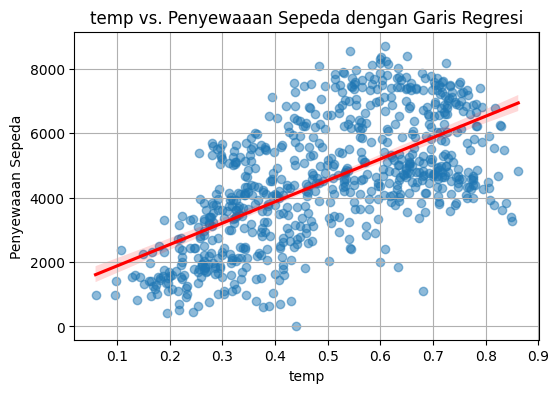

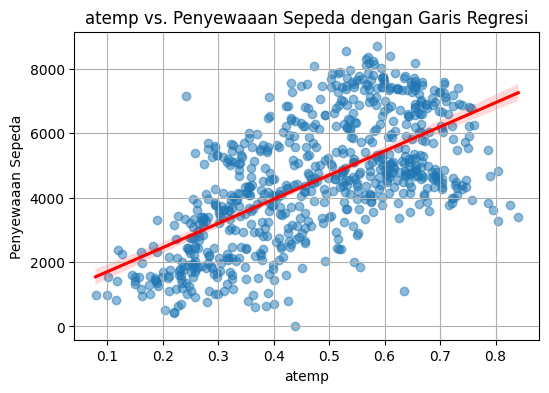

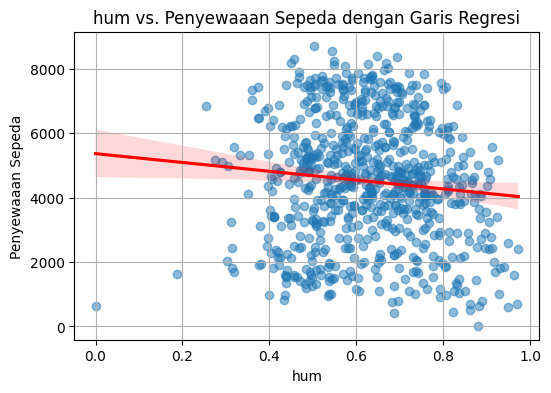

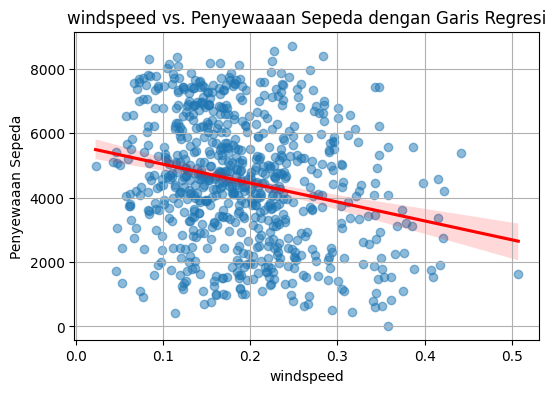

In [39]:
# Membuat Variabel yang diassign dengan kolom data yang akan dibandingkan korelasinya
weather_vars = ['temp', 'atemp', 'hum', 'windspeed']

# Menampilkan 4 perulangan for untuk menampilkan visualisasi korelasi antara variabel cuaca dan jumlah Penyewaaan sepada
for var in weather_vars:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=day_df[var], y=day_df['cnt'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'{var} vs. Penyewaaan Sepeda dengan Garis Regresi')
    plt.xlabel(var)
    plt.ylabel('Penyewaaan Sepeda')
    plt.grid(True)
    plt.show()

- Pada hari kerja , peminjaman meningkat tajam pada jam 07.00 - 08.00 pagi dan jam 16.00 - 18.00 sore, menunjukkan pola penggunaan mobilisasi pekerja dan siswa untuk perjalanan ke dan dari tempat kerja atau sekolah. Sementara itu, pada hari libur, jumlah peminjaman lebih tersebar merata sepanjang hari, dengan puncak lebih lambat sekitar pukul jam 12.00 - 15.00 siang. Hal ini mengindikasikan bahwa pada hari kerja, layanan peminjaman lebih banyak digunakan untuk transportasi rutin, sedangkan pada hari libur lebih cenderung digunakan untuk rekreasi atau aktivitas santai.
- Suhu (temp dan atemp) memiliki korelasi positif kuat dengan jumlah peminjaman, menunjukkan bahwa cuaca hangat meningkatkan penggunaan layanan. Sebaliknya, kelembapan (hum) memiliki pengaruh negatif kecil, sementara kecepatan angin (windspeed) menunjukkan korelasi negatif lebih signifikan, yang berarti angin kencang dapat mengurangi peminjaman. Ini mengindikasikan bahwa kondisi cuaca yang nyaman mendukung peningkatan peminjaman, sedangkan kondisi ekstrim seperti angin kencang dapat menurunkannya.

## Analisis Lanjutan (Opsional)

Analisis lanjutan ini digunakan *clustering* dengan metode *binning*  bertujuan untuk menganalisis hubungan antara jumlah penyewaan sepeda dengan rata-rata suhu dan kecepatan angin.

Batasan bin ini digunakan untuk mengelompokkan jumlah penyewaan sepeda (cnt) ke dalam beberapa kategori, diantaranya:
- 0–1000 (Sangat Rendah)
- 1000–2000 (Rendah)
- 2000–3000 (Sedang)
- 3000–4000 (Cukup Tinggi)
- 4000–5000 (Tinggi)
- 5000–10000 (Sangat Tinggi)

Dilakukan perhitungan rata-rata suhu untuk setiap kategori jumlah penyewaan sepeda dan rata-rata kecepatan angin untuk setiap kategori jumlah penyewaan sepeda. Setelah itu, dibuat visualisasi data *Bar Plot*.

<ipython-input-40-0e1b4f01102b>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_temp_by_bin = day_df.groupby('cnt_bin')['temp'].mean()


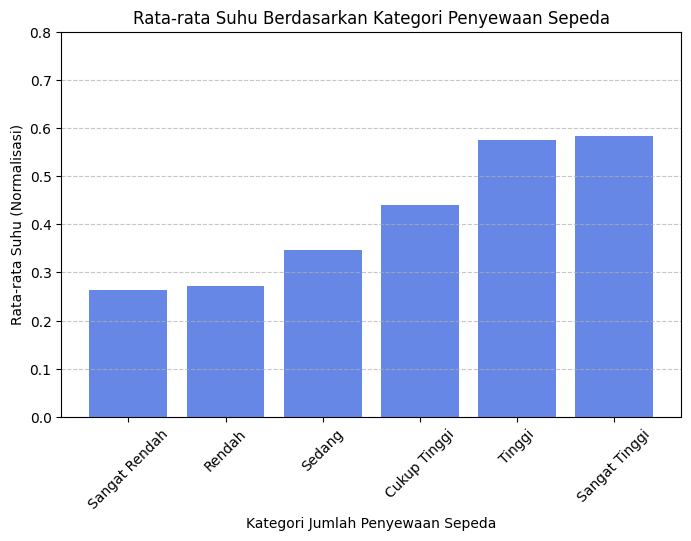

<ipython-input-40-0e1b4f01102b>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_windspeed_by_bin = day_df.groupby('cnt_bin')['windspeed'].mean()


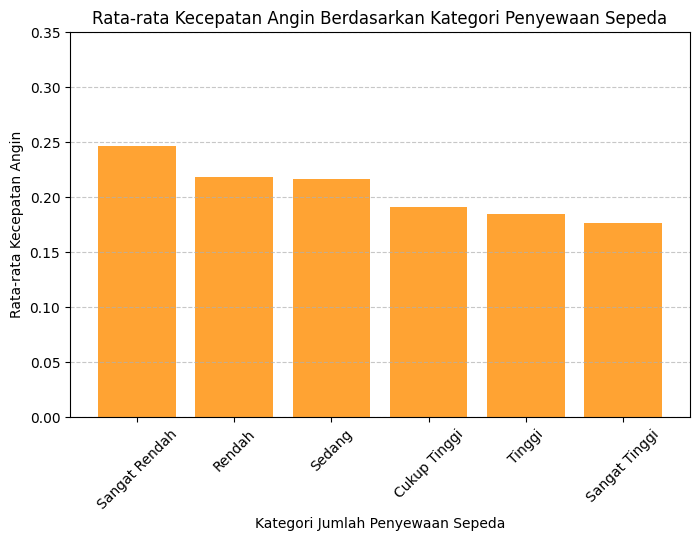

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Definisikan batas bin untuk 'cnt' dan label kategori yang sesuai
bin_edges = [0, 1000, 2000, 3000, 4000, 5000, 8000]
bin_labels = ["Sangat Rendah", "Rendah", "Sedang", "Cukup Tinggi", "Tinggi", "Sangat Tinggi"]

# Buat kolom baru 'cnt_bin' dengan nilai yang dikelompokkan berdasarkan kategori
day_df['cnt_bin'] = pd.cut(day_df['cnt'], bins=bin_edges, labels=bin_labels)

# Hitung rata-rata suhu ('temp') untuk setiap bin
average_temp_by_bin = day_df.groupby('cnt_bin')['temp'].mean()

# Visualisasi hasil dalam bentuk bar chart
plt.figure(figsize=(8, 5))
plt.bar(average_temp_by_bin.index.astype(str), average_temp_by_bin.values, color='royalblue', alpha=0.8)
plt.xlabel("Kategori Jumlah Penyewaan Sepeda")
plt.ylabel("Rata-rata Suhu (Normalisasi)")
plt.title("Rata-rata Suhu Berdasarkan Kategori Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.ylim(0, 0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Hitung rata-rata kecepatan angin ('windspeed') untuk setiap bin
average_windspeed_by_bin = day_df.groupby('cnt_bin')['windspeed'].mean()

# Visualisasi hasil dalam bentuk bar chart
plt.figure(figsize=(8, 5))
plt.bar(average_windspeed_by_bin.index.astype(str), average_windspeed_by_bin.values, color='darkorange', alpha=0.8)
plt.xlabel("Kategori Jumlah Penyewaan Sepeda")
plt.ylabel("Rata-rata Kecepatan Angin")
plt.title("Rata-rata Kecepatan Angin Berdasarkan Kategori Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.ylim(0, 0.35)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insight:**
- Penyewaan sepeda cenderung meningkat saat suhu lebih tinggi, menunjukkan bahwa pengguna lebih nyaman bersepeda dalam kondisi yang lebih hangat.
- Kecepatan angin yang tinggi cenderung menurunkan jumlah penyewaan, kemungkinan karena pengaruh angin terhadap kenyamanan dan keamanan saat bersepeda.

## Conclusion

- Dari hasil analisis data untuk pertanyaan 1, penyewaan sepeda di hari kerja dipengaruhi oleh mobilitas pekerja dan pelajar, sedangkan pada hari libur banyak penyewaan sepeda sebagai sarana rekreasi. Sehingga menjadi peluang bagi bisnis penyewaan sepeda di hari libur untuk melakukan promosi yang dapat meningkatkan lebih jumlah penyewaan sepeda.
- Dari hasil analisis data untuk pertanyaan 2, Suhu memiliki korelasi positif terhadap penyewaan sepeda. Sedangkan kelembapan dan kecepatan angin cenderung berkorelasi negatif. Sehingga beberapa kondisi cuaca tertentu mempengaruhi jumlah penyewaan sepeda harian.